In [199]:
import os
import pickle
import numpy as np

In [200]:
subject_id = 'c2s05'

data_dir = '../data'
subject_dir = os.path.join(data_dir, subject_id)

In [201]:
with open(os.path.join(subject_dir, 'ecg.pkl'), 'rb') as f:
    ecg_df = pickle.load(f)
print(ecg_df.head())

                                                  ecg                 start_t  \
59  [-8.479761122127941, -8.417907249392165, -8.43... 2022-11-28 10:34:00.895   
60  [-31.988616884980303, -33.393613919193115, -34... 2022-11-28 10:34:01.819   
61  [81.63300073021654, 83.76511264501836, 86.7174... 2022-11-28 10:34:02.747   
62  [-185.4418722322144, -186.7096927310369, -187.... 2022-11-28 10:34:03.699   
63  [8.322659033501104, 7.309988233502931, 6.76771... 2022-11-28 10:34:04.583   

                     end_t  glucose  CGM_idx           Timestamp  \
59 2022-11-28 10:34:03.895    114.0  20671.0 2022-11-28 10:34:25   
60 2022-11-28 10:34:04.819    114.0  20671.0 2022-11-28 10:34:25   
61 2022-11-28 10:34:05.747    114.0  20671.0 2022-11-28 10:34:25   
62 2022-11-28 10:34:06.699    114.0  20671.0 2022-11-28 10:34:25   
63 2022-11-28 10:34:07.583    114.0  20671.0 2022-11-28 10:34:25   

    HRConfidence  ECGNoise  
59         100.0  0.000353  
60         100.0  0.000473  
61         100.0 

In [202]:
with open(os.path.join(subject_dir, 'ppg.pkl'), 'rb') as f:
    ppg_df = pickle.load(f)
print(ppg_df.head())

                                                 ppg             start_t  \
0  [-10.718720302362524, -11.370651743800739, -12... 2022-11-28 11:36:24   
1  [333.0466601173821, 281.89613193102855, 230.68... 2022-11-28 11:36:39   
2  [129.68163173821893, 113.26727415569061, 107.4... 2022-11-28 11:36:54   
3  [-31.55349026765098, -16.697704769172283, -0.1... 2022-11-28 11:37:09   
4  [-1.3380117886921798, -2.6177477779183373, -3.... 2022-11-28 11:37:24   

                end_t  glucose  CGM_idx           Timestamp  
0 2022-11-28 11:36:54    106.0  20684.0 2022-11-28 11:39:25  
1 2022-11-28 11:37:09    106.0  20684.0 2022-11-28 11:39:25  
2 2022-11-28 11:37:24    106.0  20684.0 2022-11-28 11:39:25  
3 2022-11-28 11:37:39    106.0  20684.0 2022-11-28 11:39:25  
4 2022-11-28 11:37:54    106.0  20684.0 2022-11-28 11:39:25  


In [203]:
with open(os.path.join(subject_dir, 'eda.pkl'), 'rb') as f:
    eda_df = pickle.load(f)
print(eda_df.head())

                                              phasic  \
0  [0.0, 0.0038349778046426856, 0.023030442957929...   
0  [0.013865662156080594, 0.011302662156080584, 0...   
0  [0.0033171786734700337, 0.0033178054806908275,...   
0  [0.0001593967364969251, 0.0027221550384572968,...   
0  [0.08349025754057288, 0.08477225754057288, 0.0...   

                                               tonic                 start_t  \
0  [0.0, 9.02219535731455e-06, 3.455704207002211e... 2022-11-28 11:36:24.000   
0  [0.10274233784391941, 0.10274233784391941, 0.1... 2022-11-28 11:39:25.250   
0  [0.12994882132652996, 0.12994819451930917, 0.1... 2022-11-28 11:44:25.250   
0  [0.13566960326350308, 0.1356698449615427, 0.13... 2022-11-28 11:49:25.250   
0  [0.05233874245942713, 0.05233874245942713, 0.0... 2022-11-28 11:54:25.250   

                    end_t  glucose  CGM_idx           Timestamp  
0 2022-11-28 11:39:24.750    106.0  20684.0 2022-11-28 11:39:25  
0 2022-11-28 11:44:24.750    104.0  20685.0 2022-1

## CGM segments

In [204]:
ecg_cgm_idx = set(ecg_df['CGM_idx'].unique())
print(len(ecg_cgm_idx))

3186


In [205]:
ppg_cgm_idx = set(ppg_df['CGM_idx'].unique())
print(len(ppg_cgm_idx))


3520


In [206]:
eda_cgm_idx = set(eda_df['CGM_idx'].unique())
print(len(eda_cgm_idx))

3366


/mnt/nvme-data1/mtseng/miniconda3/envs/ecg/lib/python3.11/site-packages/matplotlib_venn/_util.py:62: UserWarning: venn3_unweighted is deprecated. Use venn3 with the appropriate layout_algorithm instead.
  warnings.warn(


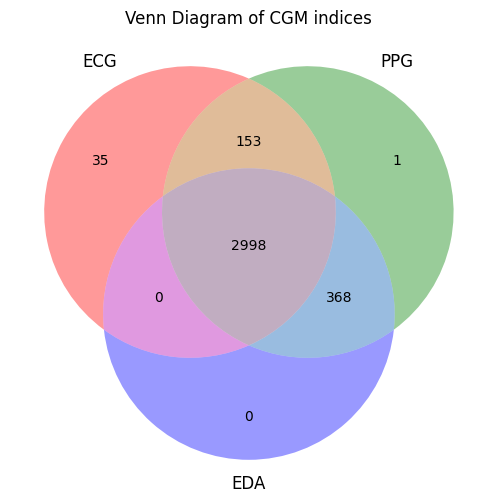

In [207]:
from matplotlib_venn import venn3_unweighted
import matplotlib.pyplot as plt

# Calculate sets
ecg_set = set(ecg_cgm_idx)
ppg_set = set(ppg_cgm_idx)
eda_set = set(eda_cgm_idx)

# Calculate overlaps
only_ecg = len(ecg_set - ppg_set - eda_set)
only_ppg = len(ppg_set - ecg_set - eda_set)
only_eda = len(eda_set - ecg_set - ppg_set)
ecg_and_ppg = len(ecg_set & ppg_set - eda_set)
ecg_and_eda = len(ecg_set & eda_set - ppg_set)
ppg_and_eda = len(ppg_set & eda_set - ecg_set)
all_three = len(ecg_set & ppg_set & eda_set)

# Create the Venn diagram
plt.figure(figsize=(8, 6))
venn = venn3_unweighted(
    subsets=(only_ecg, only_ppg, ecg_and_ppg, only_eda, ecg_and_eda, ppg_and_eda, all_three),
    set_labels=("ECG", "PPG", "EDA")
)

# Add title
plt.title("Venn Diagram of CGM indices")
# Show the plot
plt.show()


In [208]:
shared_cgm_idx = sorted(list(ecg_cgm_idx & ppg_cgm_idx & eda_cgm_idx))
print(len(shared_cgm_idx))

2998


In [209]:
corresponding_glucose_values = []
for cgm_idx in shared_cgm_idx:
    corresponding_glucose_values.append(ecg_df[ecg_df['CGM_idx'] == cgm_idx]['glucose'].values[0])

In [210]:
shared_cgm_idx = np.array(shared_cgm_idx)
corresponding_glucose_values = np.array(corresponding_glucose_values)

In [211]:
hypo_indices = shared_cgm_idx[np.where(corresponding_glucose_values < 70)]
print("Number of hypoglycemic indices: ", len(hypo_indices))

Number of hypoglycemic indices:  230


In [212]:
normal_indices = shared_cgm_idx[np.where((corresponding_glucose_values >= 70) & (corresponding_glucose_values <= 180))]
print("Number of normal indices: ", len(normal_indices))

Number of normal indices:  2768


In [213]:
# five fold cross validation
np.random.seed(0)
np.random.shuffle(hypo_indices)
np.random.shuffle(normal_indices)

n_folds = 5
hypo_start = np.arange(0, len(hypo_indices), len(hypo_indices) // n_folds)
normal_start = np.arange(0, len(normal_indices), len(normal_indices) // n_folds)

folds = {}
for i in range(n_folds):
    hypo_fold = hypo_indices[hypo_start[i]:hypo_start[i] + len(hypo_indices) // n_folds]
    normal_fold = normal_indices[normal_start[i]:normal_start[i] + len(normal_indices) // n_folds]
    val_fold = np.concatenate([hypo_fold, normal_fold])
    train_fold = np.concatenate([hypo_indices, normal_indices])
    train_fold = np.setdiff1d(train_fold, val_fold)
    folds[f"v{i+1}"] = {
        "train": list(train_fold),
        "val": list(val_fold)
    }

In [214]:
for i, key in enumerate(folds):
    print("Fold ", key, " Train size: ", len(folds[key]['train']), " Val size: ", len(folds[key]['val']))

Fold  v1  Train size:  2399  Val size:  599
Fold  v2  Train size:  2399  Val size:  599
Fold  v3  Train size:  2399  Val size:  599
Fold  v4  Train size:  2399  Val size:  599
Fold  v5  Train size:  2399  Val size:  599


In [215]:
out_json_path = os.path.join(subject_dir, 'metadata.json')

import json
with open(out_json_path, 'w') as f:
    json.dump(folds, f, indent=4)